In [1]:
import numpy as np
import matplotlib.pyplot as pp

In [3]:
x = np.random.normal(size=10000)

x[0:10]

array([ 0.03641906,  0.97370716, -0.14959101,  0.44467125,  0.76462042,
        0.89556016,  0.44076601,  1.26094765, -1.32095581,  0.62793575])

(array([1.000e+00, 1.000e+00, 5.000e+00, 9.000e+00, 1.500e+01, 2.300e+01,
        6.600e+01, 1.080e+02, 1.800e+02, 2.940e+02, 4.480e+02, 5.640e+02,
        7.940e+02, 8.650e+02, 1.014e+03, 1.094e+03, 9.970e+02, 9.410e+02,
        7.850e+02, 5.850e+02, 4.760e+02, 2.960e+02, 1.930e+02, 1.140e+02,
        6.900e+01, 3.300e+01, 1.800e+01, 6.000e+00, 3.000e+00, 3.000e+00]),
 array([-4.05696613, -3.79668922, -3.53641231, -3.2761354 , -3.01585849,
        -2.75558158, -2.49530467, -2.23502776, -1.97475085, -1.71447394,
        -1.45419703, -1.19392012, -0.93364321, -0.6733663 , -0.41308939,
        -0.15281248,  0.10746443,  0.36774134,  0.62801825,  0.88829516,
         1.14857207,  1.40884898,  1.66912589,  1.9294028 ,  2.18967971,
         2.44995662,  2.71023353,  2.97051044,  3.23078735,  3.49106426,
         3.75134117]),
 <BarContainer object of 30 artists>)

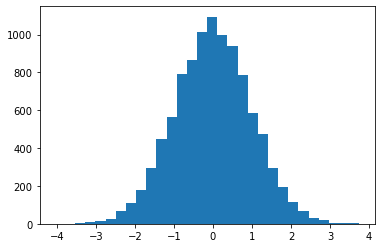

In [5]:
pp.hist(x, bins=30)

(array([19., 28., 30., 38., 36., 45., 38., 44., 37., 41., 41., 32., 30.,
        28., 13.]),
 array([-21.52280561-0.68719358j, -18.59245467-0.64138067j,
        -15.66210373-0.59556777j, -12.73175279-0.54975486j,
         -9.80140185-0.50394196j,  -6.87105091-0.45812905j,
         -3.94069997-0.41231615j,  -1.01034903-0.36650324j,
          1.92000191-0.32069034j,   4.85035285-0.27487743j,
          7.78070379-0.22906453j,  10.71105473-0.18325162j,
         13.64140567-0.13743872j,  16.57175661-0.09162581j,
         19.50210755-0.04581291j,  22.43245849+0.j        ]),
 <BarContainer object of 15 artists>)

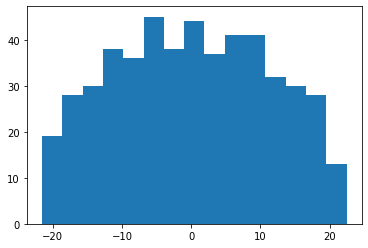

In [8]:
mat = np.random.normal(size=(500,500))

vals,vecs = np.linalg.eig(mat)

pp.hist(vals, bins=15)

In [9]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd

data = pd.read_csv("players_stats_by_season_full_details.csv")

print(data.columns)

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team'],
      dtype='object')


In [36]:
matrix = data.loc[:, 'GP':'PTS'].to_numpy()
print(np.where(data.columns == 'GP'))
print(np.where(data.columns == 'PTS'))

(array([5]),)
(array([21]),)


In [11]:
labels = data.columns[5:22].to_numpy()
print(labels)

['GP' 'MIN' 'FGM' 'FGA' '3PM' '3PA' 'FTM' 'FTA' 'TOV' 'PF' 'ORB' 'DRB'
 'REB' 'AST' 'STL' 'BLK' 'PTS']


In [13]:
nmat = np.zeros(np.shape(matrix))
for i in range(np.shape(matrix)[1]):
    col = matrix[:,i]
    col -= np.mean(col)
    col /= np.std(col)
    nmat[:,i] = col
    
print(nmat[0])

[ 2.72761489  4.51238427  8.41427049  6.6928317  -0.92812677 -0.9884336
  6.34203341  9.81971541  4.69915444  4.05219388  8.1527398   7.69717301
  8.12561676  3.22767753  0.42055059 12.55558976  7.47885868]


(1, 1000)

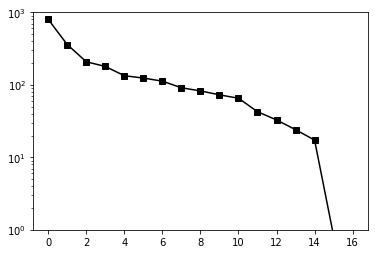

In [15]:
u,s,vt = np.linalg.svd(nmat, full_matrices=False)
pp.plot(s, 'ks-')
pp.yscale("log")
pp.ylim(1,1000)

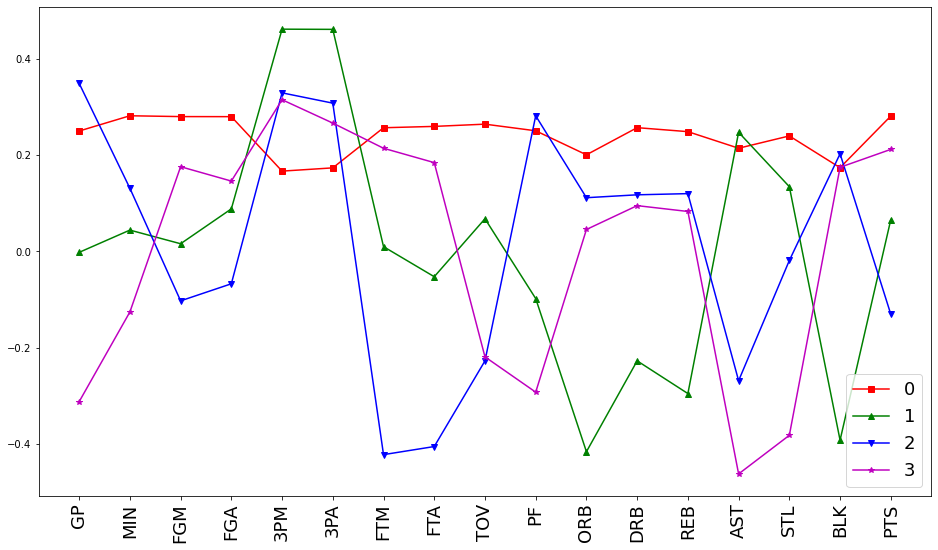

In [21]:
pp.figure(figsize=(16,9))
pp.plot(-vt[0], 'rs-', vt[1], 'g^-', vt[2], 'bv-', vt[3], 'm*-')
pp.xticks(np.arange(len(labels)), labels, fontsize=18, rotation=90)
pp.legend(np.arange(4), fontsize=18)